# Chicago Crime Dataset using Facebook's Prophet Time Series

### Content

ID - Unique identifier for the record.

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

## Importing

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [8]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [9]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [10]:
chicago_df.shape

(6017767, 23)

## Data Exploration

In [11]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [16]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [18]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [19]:
chicago_df.shape

(6017767, 8)

In [21]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [26]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [27]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [28]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [29]:
chicago_df['Primary Type'].value_counts()[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [31]:
order_data = chicago_df['Primary Type'].value_counts()[:15].index

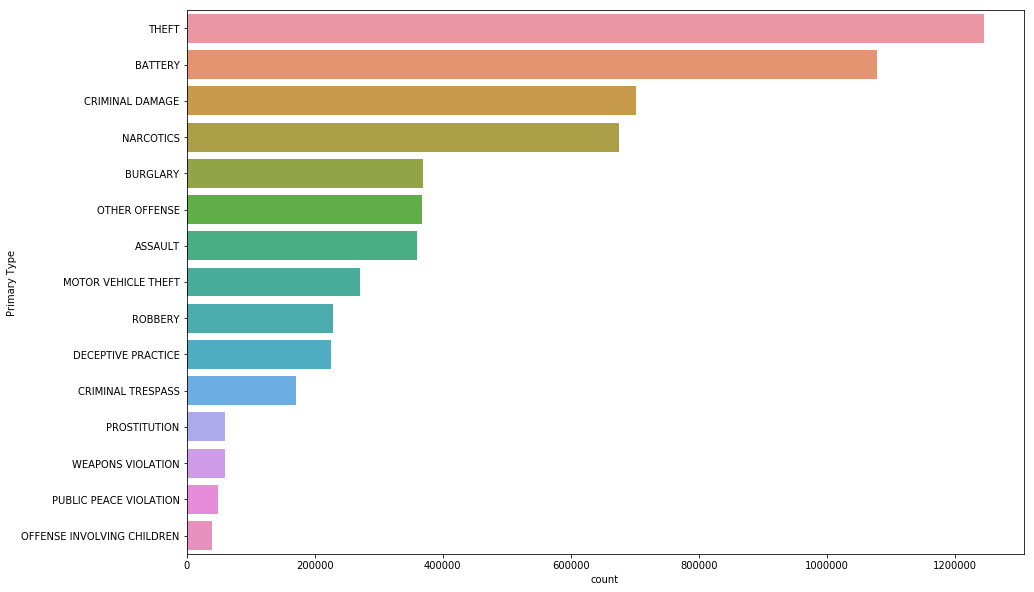

In [32]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data)

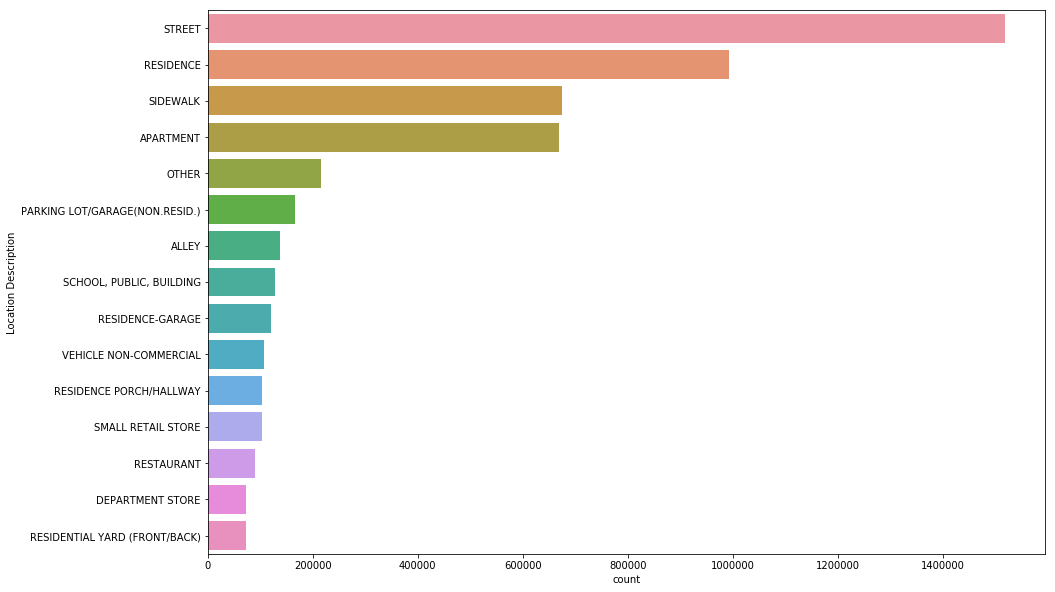

In [33]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [37]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of crimes')

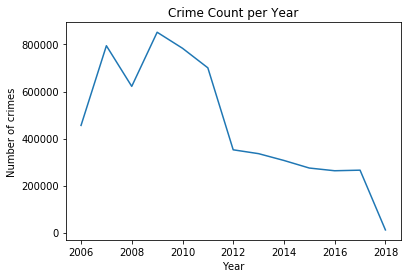

In [38]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count per Year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')

Text(0, 0.5, 'Number of Crimes')

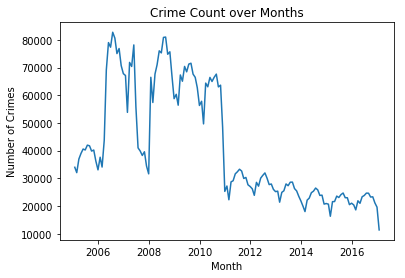

In [39]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count over Months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

#### See ?
###### It seems like the Number of Crimes is seasonal

Text(0, 0.5, 'Number of Crimes')

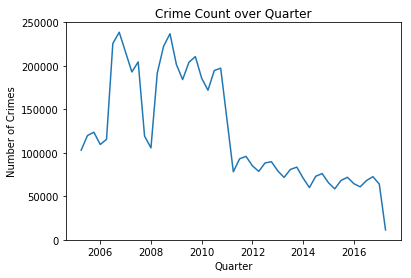

In [40]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count over Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

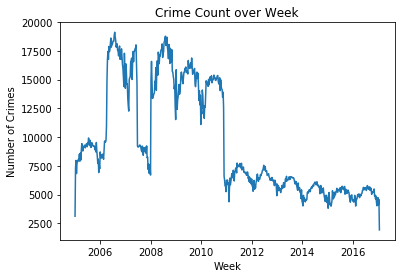

In [42]:
plt.plot(chicago_df.resample('W').size())
plt.title('Crime Count over Week')
plt.xlabel('Week')
plt.ylabel('Number of Crimes')

## Prepare Data for Prophet to look into ...

In [43]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [44]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [45]:
chicago_prophet.columns = ['Date', 'Crime Counts']

In [46]:
chicago_prophet

,Date,Crime Counts
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [50]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date':'ds', 'Crime Counts':'y'})

In [51]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


## Make Predictions

In [52]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\DELL\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [53]:
future = m.make_future_dataframe(periods = 365)
forcast = m.predict(future)

In [56]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.773642,39717.985804,72977.082222,60454.773642,60454.773642,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,-4762.404217,0.0,0.0,0.0,55692.369426
1,2005-02-28,60322.370911,33509.559573,66973.703566,60322.370911,60322.370911,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,-9500.516358,0.0,0.0,0.0,50821.854553
2,2005-03-31,60175.782173,41338.262446,75899.852718,60175.782173,60175.782173,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,-1224.151952,0.0,0.0,0.0,58951.630221
3,2005-04-30,60033.922104,44127.223754,77828.900856,60033.922104,60033.922104,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,1182.829000,0.0,0.0,0.0,61216.751104
4,2005-05-31,59887.333366,49747.237485,82322.269046,59887.333366,59887.333366,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,5498.247964,0.0,0.0,0.0,65385.581330
5,2005-06-30,59745.473296,47298.914947,79607.446259,59745.473296,59745.473296,3576.966082,3576.966082,3576.966082,3576.966082,3576.966082,3576.966082,0.0,0.0,0.0,63322.439378
6,2005-07-31,59598.884555,47522.606981,80704.502340,59598.884555,59598.884555,4582.849351,4582.849351,4582.849351,4582.849351,4582.849351,4582.849351,0.0,0.0,0.0,64181.733907
7,2005-08-31,59452.295814,47376.570765,79454.101737,59452.295814,59452.295814,4498.965423,4498.965423,4498.965423,4498.965423,4498.965423,4498.965423,0.0,0.0,0.0,63951.261237
8,2005-09-30,59310.435742,45784.935087,76864.819504,59310.435742,59310.435742,1749.360219,1749.360219,1749.360219,1749.360219,1749.360219,1749.360219,0.0,0.0,0.0,61059.795961
9,2005-10-31,59163.847001,45927.256784,79186.338790,59163.847001,59163.847001,2397.444549,2397.444549,2397.444549,2397.444549,2397.444549,2397.444549,0.0,0.0,0.0,61561.291550


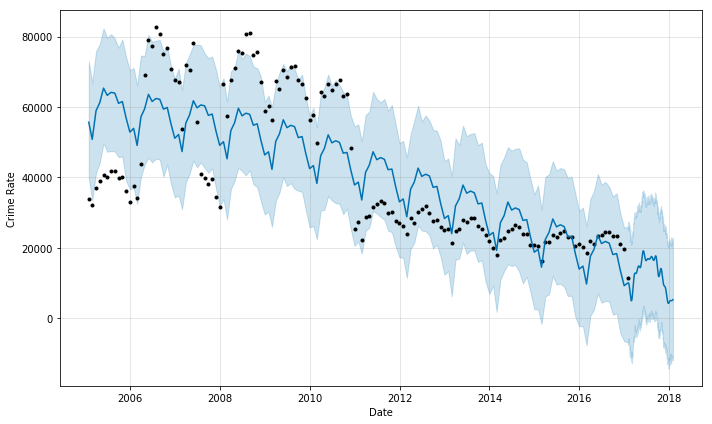

In [57]:
figure = m.plot(forcast, xlabel = 'Date', ylabel = 'Crime Rate')

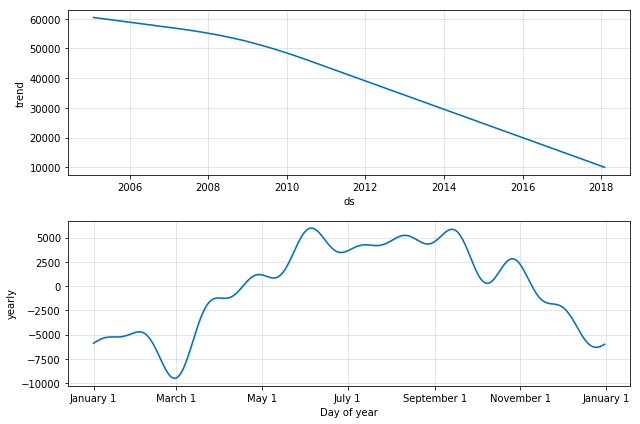

In [58]:
figure = m.plot_components(forcast)